# Example of handling MatPlotLib Figures and Axes as objects

In [69]:
import glob
import pandas as pd
#import random
#import paho.mqtt.client as mqtt
import string
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy as np

In [19]:
# Function to fetch stored unfiltered dataframes

# fetch_stored_data(n, None, False) = R5IM loss data, n = glob file index not BLM index
# fetch_stored_data(n, None, True) = cycle data, n = glob file index not BLM index

def fetch_stored_data(index=0, folder=None, cycle=True):
    
    if folder is None:
        if cycle:
            folder = '../BLM_R5IM_Data/cycle/'
        else:
            folder = '../BLM_R5IM_Data/R5IM_loss/'
    
    if folder[-1] != '/': folder += '/'        
        
    input_data = pd.read_csv(glob.glob(folder + '*.csv')[index])
    return input_data.drop(columns = input_data.columns[0]).to_numpy()

In [20]:
# fetch_stored_data(n, None, False) = R5IM loss data, n = glob file index not BLM index
# fetch_stored_data(n, None, True) = cycle data, n = glob file index not BLM index

In [21]:
labels = ["r0blm1", "r0blm3", "r0blm4", 
            "r1blm1", "r1blm2", "r1blm3", "r1blm4", 
            "r2blm1", "r2blm2", "r2blm3", "r2blm4", 
            "r3blm1", "r3blm2", "r3blm3", "r3blm4", 
            "r4blm1", "r4blm2", "r4blm3", "r4blm4", 
            "r5blm1", "r5blm2", "r5blm3", "r5blm4", 
            "r6blm1", "r6blm2", "r6blm3", "r6blm4", 
            "r7blm1", "r7blm2", "r7blm3", "r7blm4", 
            "r8blm1", "r8blm2", "r8blm3", "r8blm4", 
            "r9blm1", "r9blm2", "r9blm3", "r9blm4", 
            "r5im"]

### Function to generate axis for R5IM plot

In [27]:
def R5IM_Plot(x, y, scatter=False, ax=None):
    if ax is None: ax = plt.gca()
        
    if scatter:
        ax.scatter(x,y)
    else:
        ax.plot(x, y) ## example plot here
    ax.set_xlabel('Synchrotron Cycle Time (ms)')
    ax.set_ylabel('Intensity (V)')
    ax.grid(which='both', ls=':', lw=0.5)
    
    return(ax)

In [23]:
x_data = np.linspace(-.5, 10.5, 2200)

#### Plot R5IM

<Axes: xlabel='Synchrotron Cycle Time (ms)', ylabel='Intensity (V)'>

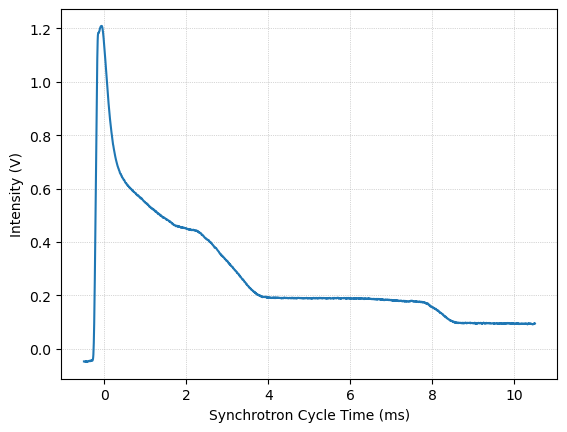

In [24]:
R5IM_Plot(x_data, -fetch_stored_data(0, None, False)[39])

#### Plot R5IM scatter

<Axes: xlabel='Synchrotron Cycle Time (ms)', ylabel='Intensity (V)'>

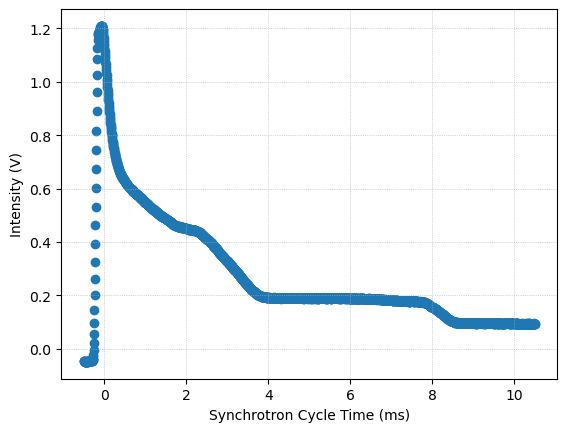

In [25]:
R5IM_Plot(x_data, -fetch_stored_data(0, None, False)[39], True)

### Function to generate axis for BLM plot

In [49]:
def BLM_Plot(x, y, blm_index, scatter=False, legend=False, ax=None):
    labels = ["r0blm1", "r0blm3", "r0blm4", 
            "r1blm1", "r1blm2", "r1blm3", "r1blm4", 
            "r2blm1", "r2blm2", "r2blm3", "r2blm4", 
            "r3blm1", "r3blm2", "r3blm3", "r3blm4", 
            "r4blm1", "r4blm2", "r4blm3", "r4blm4", 
            "r5blm1", "r5blm2", "r5blm3", "r5blm4", 
            "r6blm1", "r6blm2", "r6blm3", "r6blm4", 
            "r7blm1", "r7blm2", "r7blm3", "r7blm4", 
            "r8blm1", "r8blm2", "r8blm3", "r8blm4", 
            "r9blm1", "r9blm2", "r9blm3", "r9blm4", 
            "r5im"]
    
    if ax is None: ax = plt.gca()        
        
    if scatter:
        ax.scatter(x, y, label=labels[blm_index], s=0.5)
    else:
        ax.plot(x, y, label=labels[blm_index]) ## example plot here
    ax.set_xlabel('Synchrotron Cycle Time (ms)')
    ax.set_ylabel('BLM Signal (mV)')
    ax.grid(which='both', ls=':', lw=0.5)
    if legend: ax.legend()
    
    return(ax)

#### Plot single BLM

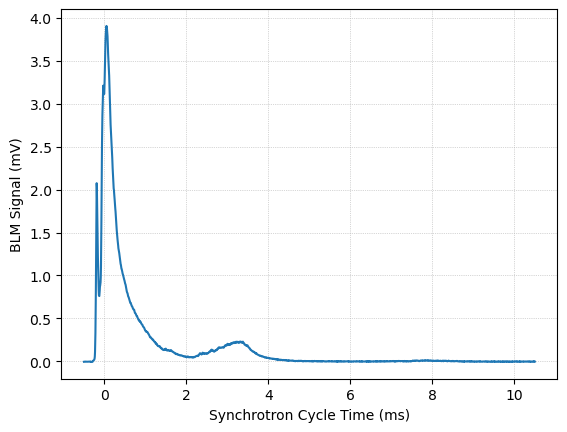

In [61]:
BLM_Plot(x_data, fetch_stored_data(0, None, False)[5], 5) ;

#### Plot 2 BLMs

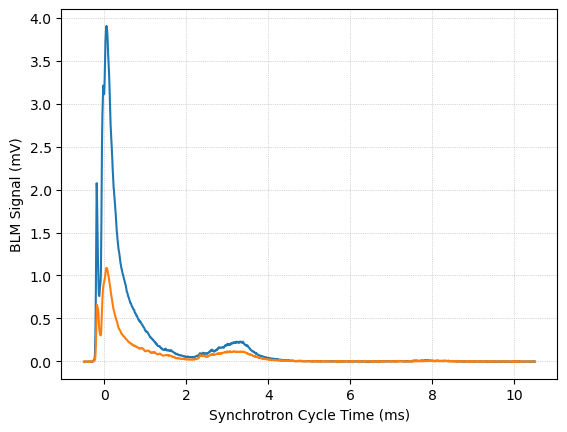

In [62]:
BLM_Plot(x_data, fetch_stored_data(0, None, False)[5], 5) 
BLM_Plot(x_data, fetch_stored_data(0, None, False)[6], 6);

#### Plot 2 BLMs; one scatter, legend on

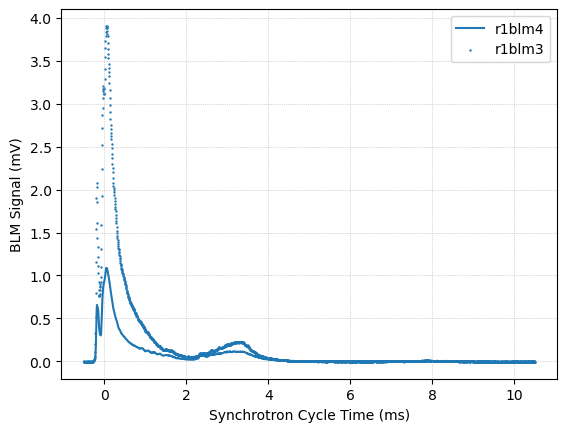

In [63]:
BLM_Plot(x_data, fetch_stored_data(0, None, False)[6], 6, False, True) 
BLM_Plot(x_data, fetch_stored_data(0, None, False)[5], 5, True, True);

#### Plot all BLMs, legend between indices 2 and 9 only

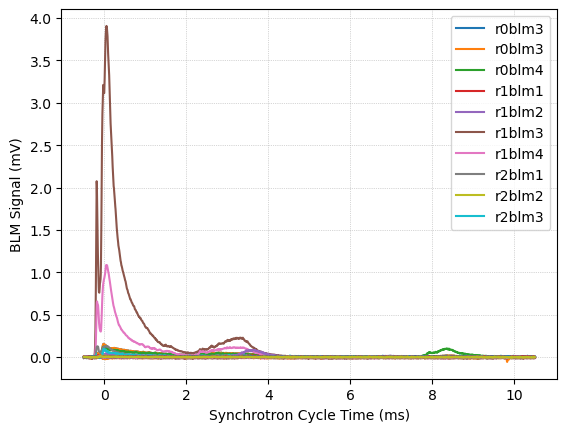

In [64]:
blm_iterator_list = np.linspace(1,38,39, dtype=int)
legend_blm_indices = [2,9] 

for i in blm_iterator_list:
    if i in legend_blm_indices:
        BLM_Plot(x_data, fetch_stored_data(0, None, False)[i], i, False, True) # legend on 
    else:
        BLM_Plot(x_data, fetch_stored_data(0, None, False)[i], i) # legend off

## Make figure, pass axes to previous functions

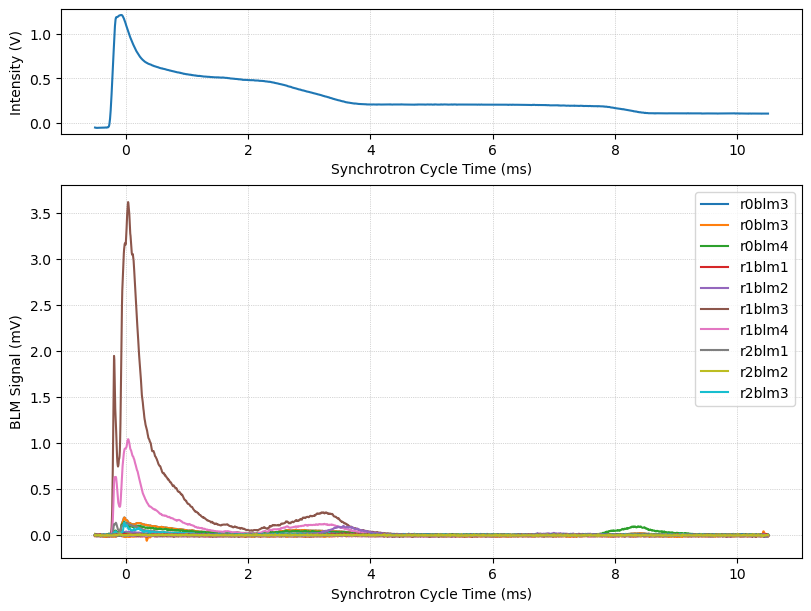

In [84]:
file_index = 2
dataframe = fetch_stored_data(file_index, None, False)

heights = [1, 3]
fig = plt.figure(figsize=(8,6),facecolor='w', edgecolor='k', constrained_layout=True)
spec = gridspec.GridSpec(ncols=1, nrows=2, figure=fig, height_ratios=heights)

# Make first subplot axis
ax_0 = fig.add_subplot(spec[0])

# copy/paste above cell & use ax_0 in function R5IM_Plot
R5IM_Plot(x_data, -dataframe[39])

# Make second subplot axis
ax_1 = fig.add_subplot(spec[1])

# copy/paste above cell & use ax_1 in function BLM_Plot
blm_iterator_list = np.linspace(1,38,39, dtype=int)
legend_blm_indices = [2,9] 

for i in blm_iterator_list:
    if i in legend_blm_indices:
        BLM_Plot(x_data, dataframe[i], i, False, True, ax_1) # legend on 
    else:
        BLM_Plot(x_data, dataframe[i], i, False, False, ax_1) # legend off